## Breast Cancer Risk Prediction

##### Objective : To identify patients at risk of breast cancer
##### Author : Mehmet Ünlü
##### Date :  September 4–7, 2025

*******************************************

#### 1.Introduction and Problem Definition

1.1.**The goal of this project** is to develop a machine learning model that can predict with high accuracy whether a patient is at risk of breast cancer, based on their various demographic, clinical, and radiological features.The most crucial output variable for this project is 'diagnosis,' which determines whether a person has cancer.

1.2.**Metodoloji** In this study, which aims for the highest score, we will follow the steps below:
1. **Exploratory Data Analysis:** We will load the dataset and perform a detailed analysis of the feature distributions, their relationships, and any outliers.
2. **Data Preprocessing:** Using the insights gained from the EDA phase, we will perform data cleaning, feature engineering, outlier analysis, skewness correction, and scaling to transform the data into the format required by the model.
3. **Model Selection:** To predict breast cancer risk with the highest accuracy, we will compare the performance of three powerful models with different approaches: Logistic Regression, Random Forest, and XGBoost.
4. **Training with Cross-Validation:** After training these three models with cross-validation, we will create an ensemble model to achieve optimal performance. This approach aims to combine the strengths of each individual model to reach a predictive power that a single model cannot. The resulting ensemble model will be selected as the final model for the project and will be tested using evaluation metrics. This ensures we arrive at the most robust and high-performing result through a scientific approach.

1.3.**Evaluation Metrics:** To evaluate the model's success, we will use metrics such as accuracy, precision, recall, F1 score, and a confusion matrix. These metrics aim to measure the model's overall performance, its correct and incorrect predictions, and the balance between classes. Specifically, by focusing on the balance between precision and recall, the goal is to accurately identify patients at risk of cancer

**********************************************

#### 2.Importing Libraries
In this section, I will load the necessary libraries for the model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import VotingClassifier

***********************************************************

#### 3. Load Data And Exploraty Data Analysis
In this section, I will perform a detailed analysis of the dataset's features.

In [2]:
train_df = pd.read_csv("/kaggle/input/breast-cancer-dataset/Breast_cancer_dataset.csv")
train_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
train_df1 = train_df.copy()
train_df1.drop(['Unnamed: 32','id'], axis=1, inplace=True)

In [4]:
train_df1.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
train_df1.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [6]:
train_df1.isna().sum()[train_df1.isna().sum() > 0]

Series([], dtype: int64)

In [7]:
train_df1.duplicated().sum()

0

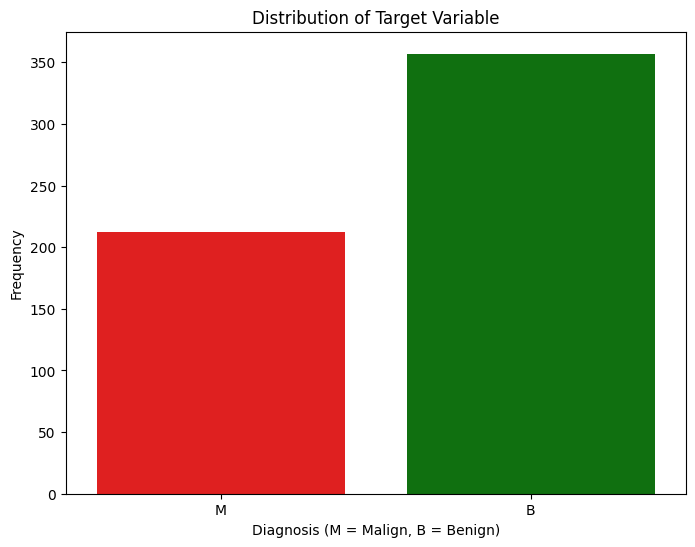

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(x='diagnosis', data=train_df1, palette=['red', 'green'])
plt.title('Distribution of Target Variable')
plt.xlabel('Diagnosis (M = Malign, B = Benign)')
plt.ylabel("Frequency")
plt.show()

train_df1['diagnosis'].value_counts(normalize=True)

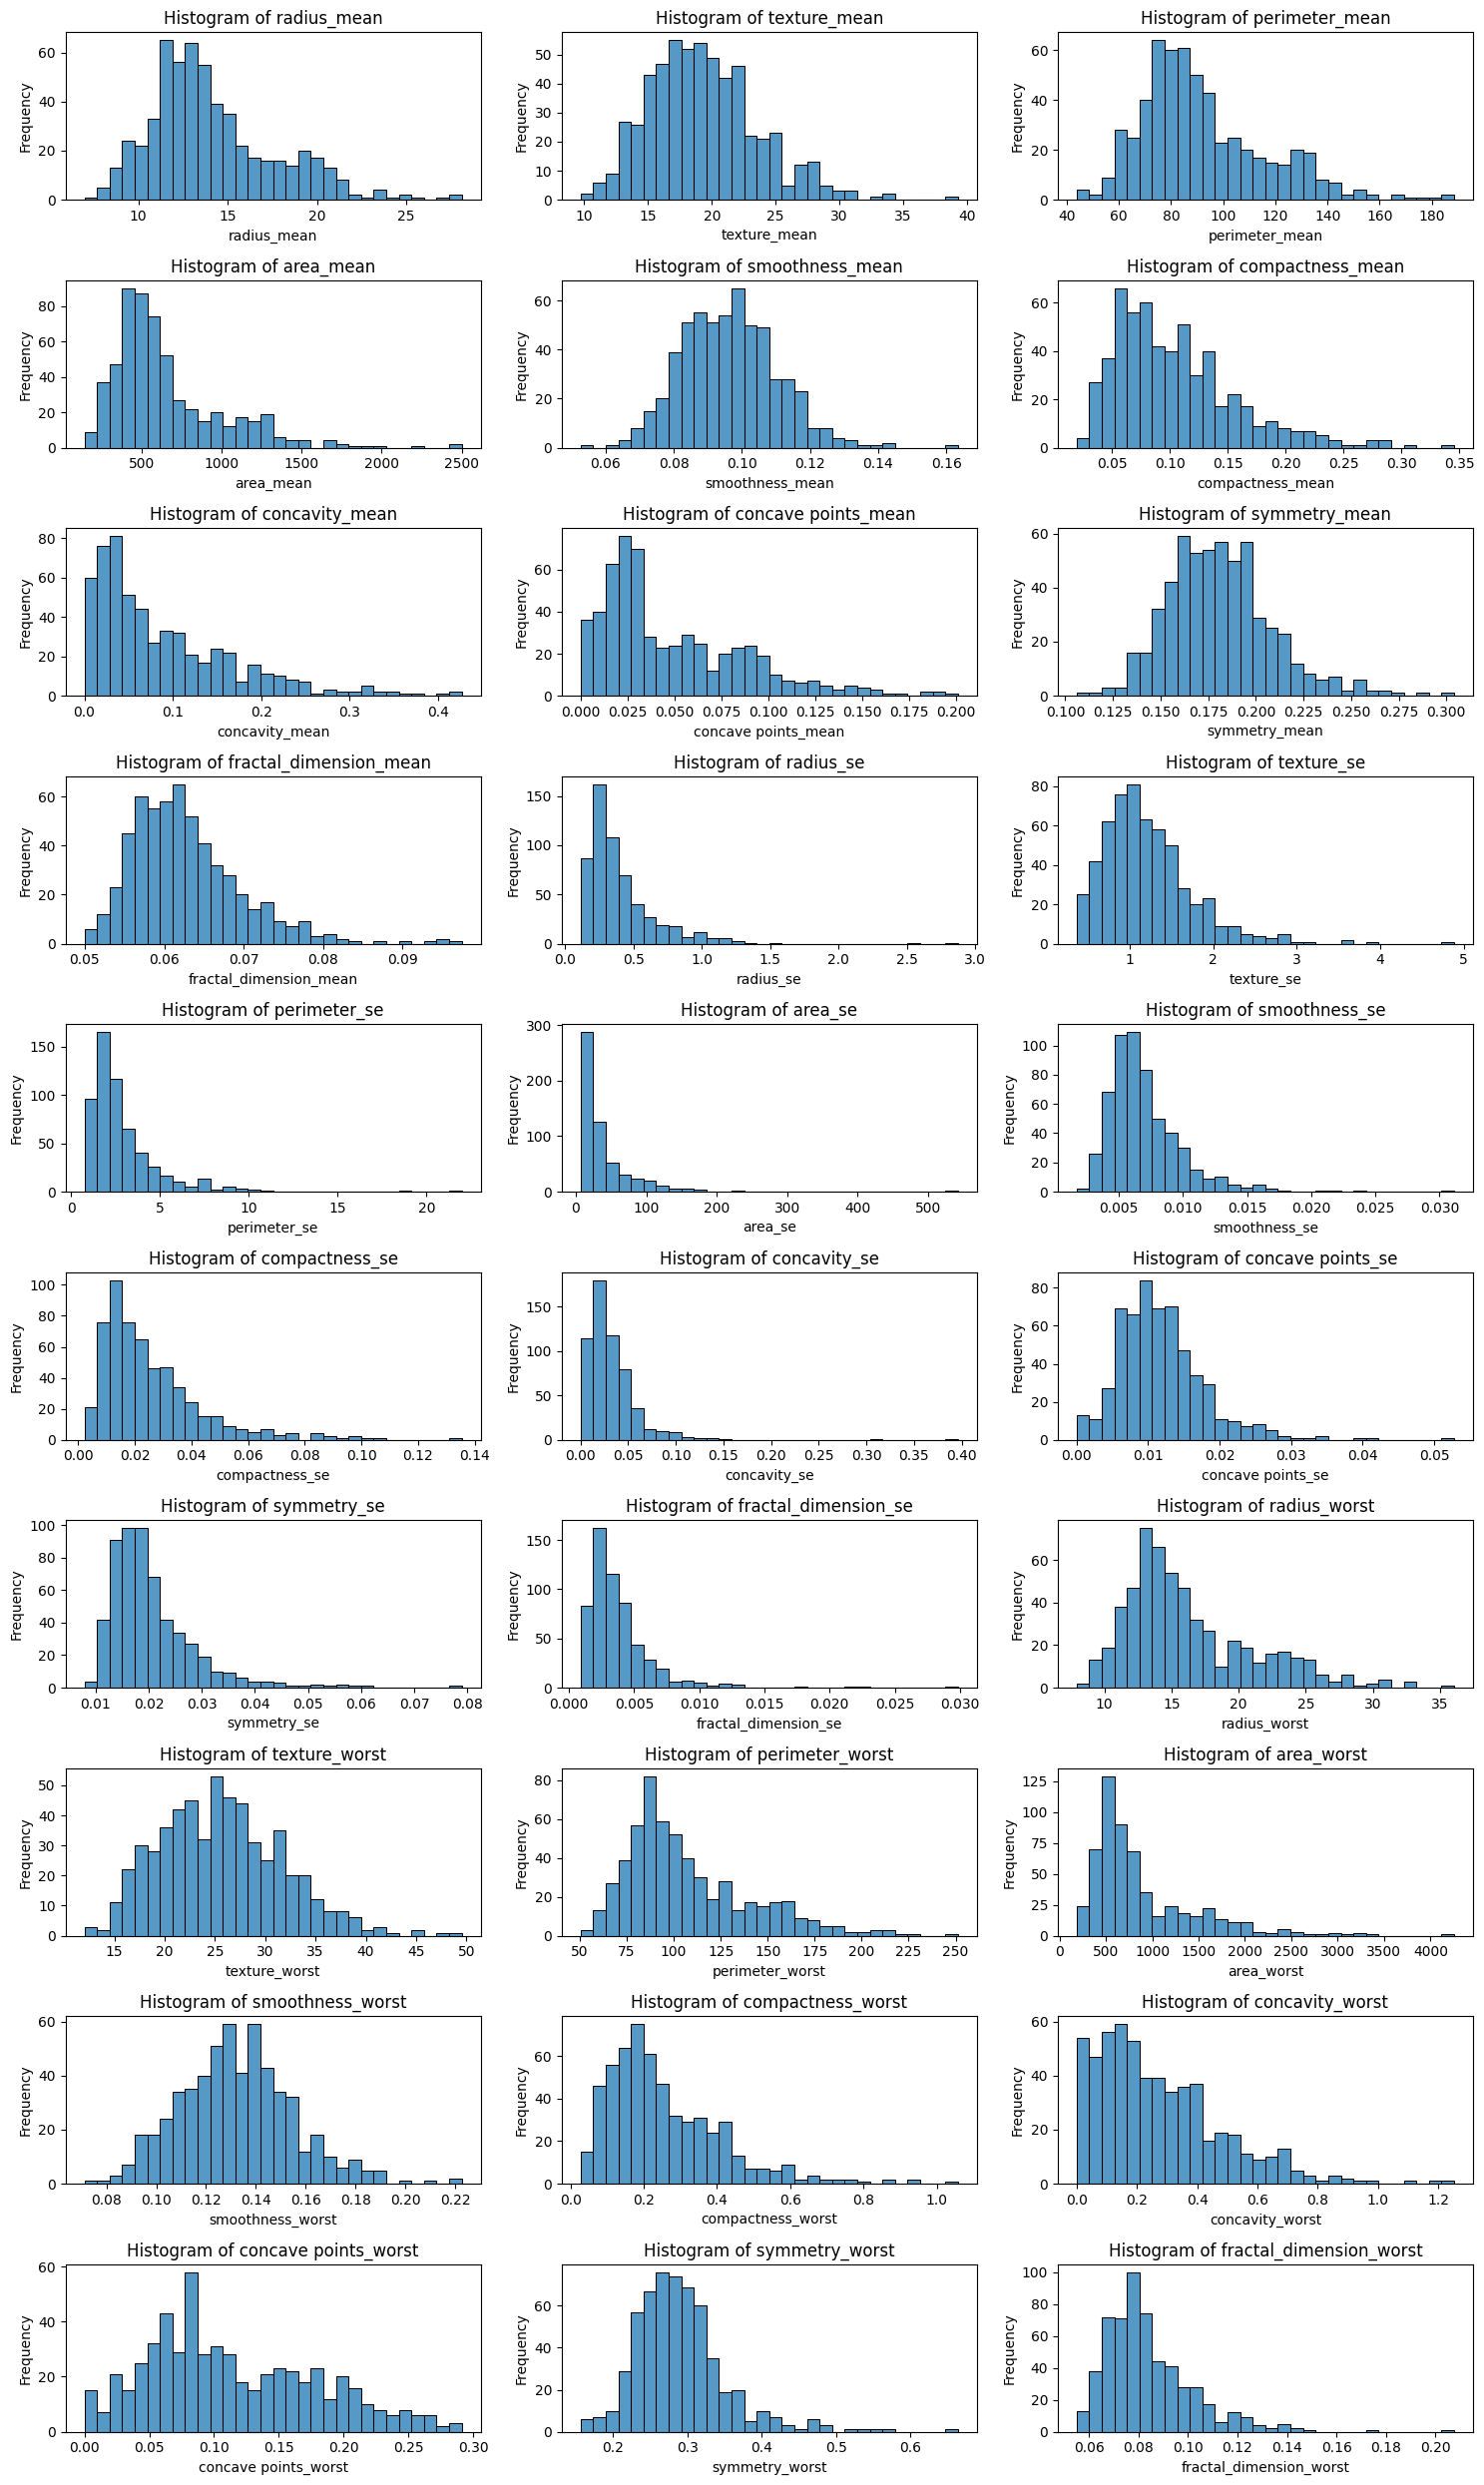

In [9]:
features = [col for col in train_df1.columns if col != 'diagnosis']

fig, axes = plt.subplots(10, 3, figsize=(15, 25))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.histplot(train_df1[feature], ax=axes[i], kde=False, bins=30)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

In this section, I reviewed the dataset in general.
1. First, I removed the id and Unnamed:32 columns from the dataset, as I determined they would have no impact on the model's performance.
2. I examined the statistical summaries of the numerical features and found significant differences between the mean, standard deviation, minimum, and maximum values of each. To help the model learn faster and more effectively, I will perform scaling on these columns.
3. I've examined the data types in the dataset and found that the target variable column is an object, while the remaining columns are floats. To ensure the model can understand the target variable, I will convert  to a numerical format.
4. Since there are no missing values or duplicate rows in the dataset, I will not perform data cleansing, data assignment, or duplicate removal.
5. I visualized the target variable to examine whether its distribution is imbalanced. Since my target variable is of object type, I couldn’t view its statistical information, but based on the visualization, I concluded that it might be imbalanced. I may also need to address this issue.
6. Finally, I visualized the distribution of my numerical variables. In the plots, some columns appeared to be skewed, so I will use the skew method to correct the skewed values

**************************************

#### 4.Data Preprocessing

In this section, I will perform operations on the dataset using the information obtained from the EDA phase, to help the model learn better.

In [10]:
train_df1['diagnosis'] = train_df1['diagnosis'].map({'M':1, 'B':0})

In [11]:
for column in features:
    Q1 = train_df1[column].quantile(0.25)
    Q3 = train_df1[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR

    train_df1 = train_df1[(train_df1[column] >= lower_bound) & (train_df1[column] <= upper_bound)]

print(f"Previous Dataset Size: {train_df.shape[0]}")
print(f"New Dataset Size: {train_df1.shape[0]}")

Previous Dataset Size: 569
New Dataset Size: 378


In [12]:
skewness = train_df1[features].apply(lambda x: skew(x))
print('skew values\n',skewness)

for column in features:
    if skewness[column] > 0.5:
        train_df1[column] = np.log1p(train_df1[column])
    elif skewness[column] < -0.5:
        train_df1[column] = np.expm1(train_df1[column])


new_skewness = train_df1[features].apply(lambda x: skew(x))
print('new skew values\n', new_skewness)

skew values
 radius_mean                0.298149
texture_mean               0.598204
perimeter_mean             0.320121
area_mean                  0.828242
smoothness_mean            0.198658
compactness_mean           0.879048
concavity_mean             1.478947
concave points_mean        1.192318
symmetry_mean              0.403931
fractal_dimension_mean     0.529029
radius_se                  1.105183
texture_se                 0.729290
perimeter_se               1.124914
area_se                    1.461382
smoothness_se              0.903556
compactness_se             0.956716
concavity_se               0.809898
concave points_se          0.451749
symmetry_se                0.824886
fractal_dimension_se       0.894117
radius_worst               0.546531
texture_worst              0.376668
perimeter_worst            0.537777
area_worst                 1.028661
smoothness_worst           0.235181
compactness_worst          0.833576
concavity_worst            0.850249
concave points_

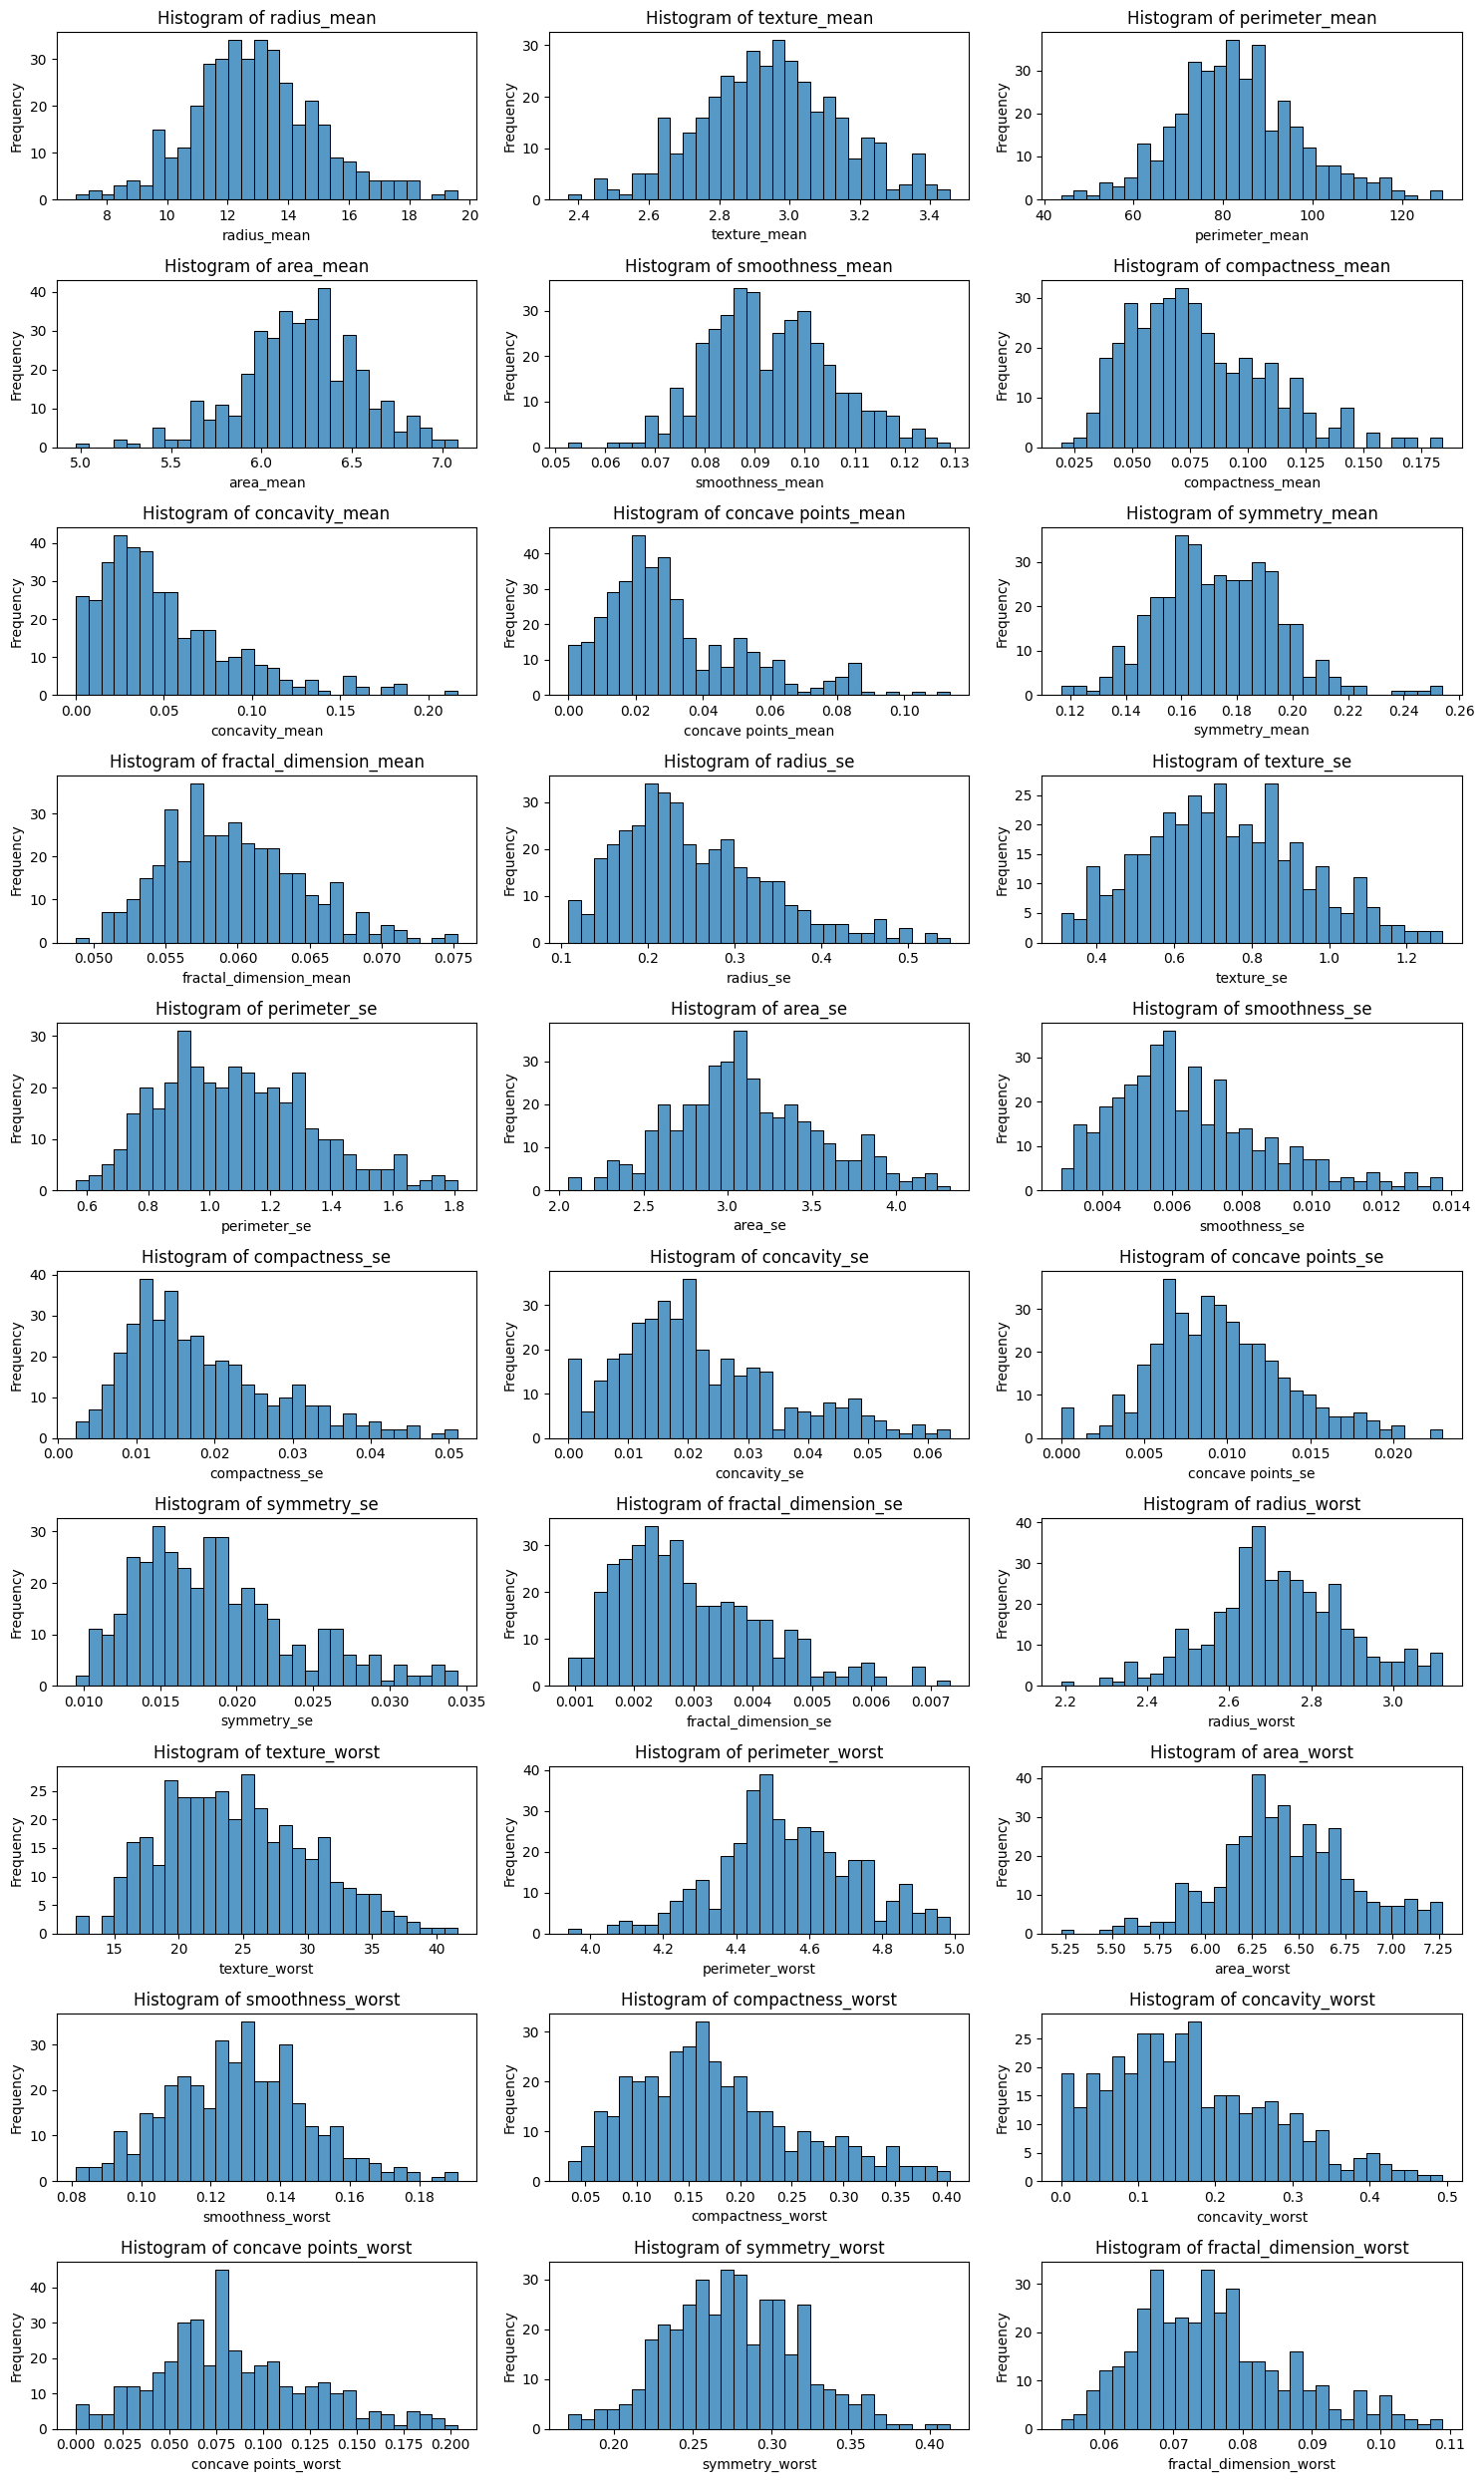

In [13]:
features = [col for col in train_df1.columns if col != 'diagnosis']

fig, axes = plt.subplots(10, 3, figsize=(15, 25))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.histplot(train_df1[feature], ax=axes[i], kde=False, bins=30)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

In [14]:
scaler = StandardScaler()

train_df1[features] = scaler.fit_transform(train_df1[features])

print(f"New Dataset Size: {train_df1.shape}")

New Dataset Size: (378, 31)


In this section, I transformed the data into a format that allows the model to learn effectively and achieve optimal performance.
1. First, I converted the object column into a numerical format for the model to understand.
2. I analyzed and removed the outlier values.
3. I used a skewness correction method to fix the skewed numerical columns.
4. Finally, I scaled the numerical features that have different value ranges.

**********************************************

#### 5. Model Train
Up to this section, I've prepared the dataset for the model to achieve its highest performance. In this section, I will split the dataset into training and testing sets. After that, I will train different models and examine their results.

In [15]:
X = train_df1.drop('diagnosis', axis=1)
y = train_df1['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(f'accuracy score: {accuracy_score(y_test, y_pred_rf)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_rf)}')

accuracy score: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        57
           1       0.89      0.89      0.89        19

    accuracy                           0.95        76
   macro avg       0.93      0.93      0.93        76
weighted avg       0.95      0.95      0.95        76



In [17]:
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print(f'accuracy score: {accuracy_score(y_test, y_pred_xgb)}')
print(f'classification report:\n {classification_report(y_test, y_pred_xgb)}')

accuracy score: 0.9473684210526315
classification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        57
           1       0.94      0.84      0.89        19

    accuracy                           0.95        76
   macro avg       0.95      0.91      0.93        76
weighted avg       0.95      0.95      0.95        76



In [18]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print(f'accuracy score: {accuracy_score(y_test, y_pred_lr)}')
print(f'classification report:\n {classification_report(y_test, y_pred_lr)}')

accuracy score: 0.9868421052631579
classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       1.00      0.95      0.97        19

    accuracy                           0.99        76
   macro avg       0.99      0.97      0.98        76
weighted avg       0.99      0.99      0.99        76



In this section, I trained three different models on the prepared dataset and evaluated their results. Overall, the models are performing well.

********************************

#### 6.Cross Validation
In this section, I will use the cross-validation method to evaluate the models' performance more reliably and accurately.

In [19]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='accuracy')
print(f'Cross Validation Accuracy Scores:\n {rf_cv_scores}')
print(f'Mean Accuracy: {rf_cv_scores.mean()}')
print(f'Standard Deviation of Accuracy: {rf_cv_scores.std()}')

Cross Validation Accuracy Scores:
 [1.         0.93548387 0.93333333 0.96666667 0.93333333 0.96666667
 0.96666667 0.86666667 0.9        0.93333333]
Mean Accuracy: 0.9402150537634408
Standard Deviation of Accuracy: 0.03586694492798173


In [20]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=10, scoring='accuracy')
print(f'Cross Validation Accuracy Scores:\n {lr_cv_scores}')
print(f'Mean Accuracy: {lr_cv_scores.mean()}')
print(f'Standard Deviation of Accuracy: {lr_cv_scores.std()}')

Cross Validation Accuracy Scores:
 [0.96774194 0.96774194 0.93333333 0.93333333 0.96666667 1.
 1.         0.96666667 0.9        1.        ]
Mean Accuracy: 0.9635483870967743
Standard Deviation of Accuracy: 0.03147233027803695


In [21]:
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.05, random_state=42)
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='accuracy')
print(f'Cross Validation Accuracy Scores:\n {xgb_cv_scores}')
print(f'Mean Accuracy: {xgb_cv_scores.mean()}')
print(f'Standard Deviation of Accuracy: {xgb_cv_scores.std()}')

Cross Validation Accuracy Scores:
 [1.         0.93548387 0.9        0.9        0.96666667 0.96666667
 0.93333333 0.93333333 0.9        0.96666667]
Mean Accuracy: 0.9402150537634408
Standard Deviation of Accuracy: 0.03262231623052925


********************************************

#### 7.Confusion Matrix
In this section, I will use the confusion matrix method to evaluate the models' classification performance in detail.

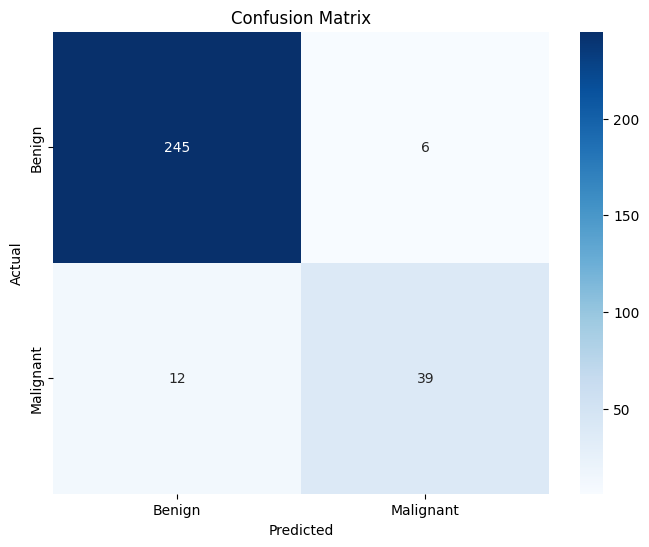

In [22]:
rf_y_pred_cv = cross_val_predict(rf_model, X_train, y_train, cv=10)

rf_cm = confusion_matrix(y_train, rf_y_pred_cv)

plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

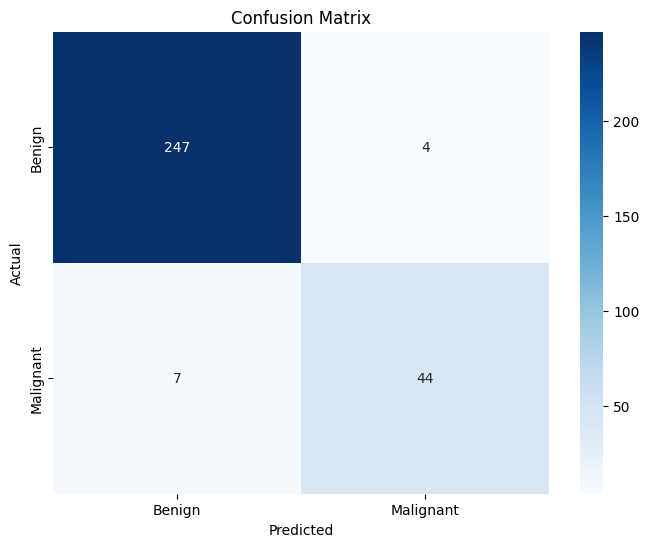

In [23]:
lr_y_pred_cv = cross_val_predict(lr_model, X_train, y_train, cv=10)

lr_cm = confusion_matrix(y_train, lr_y_pred_cv)

plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

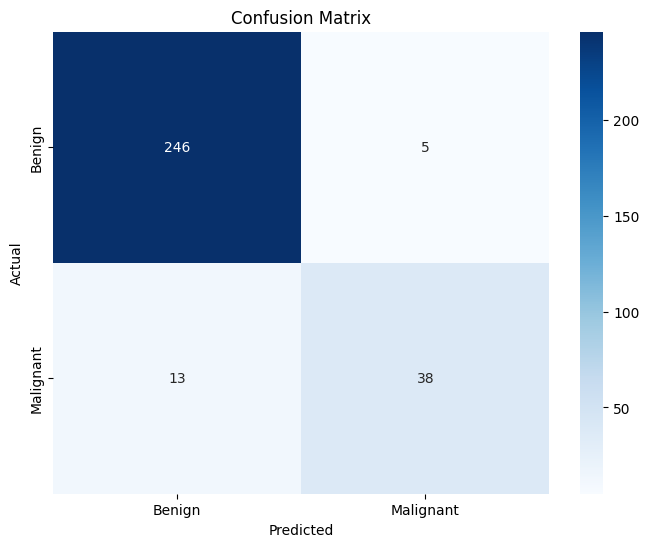

In [24]:
xgb_y_pred_cv = cross_val_predict(xgb_model, X_train, y_train, cv=10)

xgb_cm = confusion_matrix(y_train, xgb_y_pred_cv)

plt.figure(figsize=(8, 6))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The models are generally performing well, but they still make some incorrect predictions.

***************************************************************

#### 8.Ensemble Model
In this section, I will use an ensemble model to achieve more robust and reliable results.

In [25]:
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model), 
    ('xgb', xgb_model), 
    ('lr', lr_model)], voting='hard')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

voting_model.fit(X_train, y_train)

y_pred = voting_model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9605263157894737


*******************************

#### 8.Result

In this project, machine learning algorithms were used to classify malignant and benign tumors based on breast cancer data. During the data preprocessing steps, missing value checks, outlier removal, skewness correction, and scaling were applied.

The performance of the Random Forest, Logistic Regression, and XGBoost models was compared using cross-validation to ensure more robust and reliable predictions. An ensemble approach with a Voting Classifier was also implemented.

Based on the results, the Logistic Regression model achieved the highest accuracy rate. This study demonstrates that data preprocessing is critical for increasing model success and that ensemble methods can provide more reliable results. This work can be further improved in the future with hyperparameter optimization and by exploring different algorithms.